# eg01-eg29 nond3ploy flatpower

In [3]:
import json
import re
import subprocess
import os
import sqlite3 as lite
import copy
import glob
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import d3ploy.tester as tester
import d3ploy.plotter as plotter
import collections

# Delete previously generated files
direc = os.listdir('./')
hit_list = glob.glob('*.png')
for file in hit_list:
    os.remove(file)

ENV = dict(os.environ)
ENV['PYTHONPATH'] = ".:" + ENV.get('PYTHONPATH', '')

demand_eq = '60000'
name = 'eg01-eg29-flatpower-nond3ploy'
output_file = name + '.sqlite'

# Initialize dicts
metric_dict = {}
all_dict = {}
agent_entry_dict = {}

# get agent deployment
commod_dict = {'enrichmentout': ['enrichment'],
               'sourceout': ['source'],
               'power': ['lwr', 'fr', 'moxlwr'],
               'lwrstorageout': ['lwrreprocessing'],
               'frstorageout': ['frreprocessing'],
               'moxstorageout': ['moxreprocessing'],
               'lwrout': ['lwrstorage'],
               'frout': ['frstorage'],
               'moxout': ['moxstorage'],
               'lwrpu': ['frmixer', 'moxmixer'],
               'frpu': ['frmixer', 'moxmixer'],
               'moxpu': ['moxmixer'],
               'lwrreprocessingwaste': ['lwrsink'],
               'frreprocessingwaste': ['frsink'],
               'moxreprocessingwaste': ['moxsink']}

for commod, facility in commod_dict.items():
    agent_entry_dict[commod] = tester.get_agent_dict(output_file, facility)

# get supply deamnd dict
all_dict['power'] = tester.supply_demand_dict_nond3ploy(output_file,
                                                        'power',
                                                        demand_eq)

plotter.plot_demand_supply_nond3ploy(all_dict['power'],
                                     agent_entry_dict['power'], 'power',
                                     'eg01-eg29-flatpower-nond3ploy_power',
                                     True, True, 1)

front_commods = ['sourceout', 'enrichmentout']

back_commods = ['lwrstorageout', 'frstorageout', 'moxstorageout',
                'lwrreprocessingwaste', 'frreprocessingwaste',
                'moxreprocessingwaste', 'lwrout', 'frout', 'moxout',
                'frpu']

#                'lwrpu', 'frpu', 'moxpu']

for commod in front_commods:
    all_dict[commod] = tester.supply_demand_dict_nond3ploy(output_file,
                                                           commod)
    name = 'eg01-eg29-flatpower-nond3ploy_' + commod
    plotter.plot_demand_supply_nond3ploy(all_dict[commod],
                                         agent_entry_dict[commod], commod,
                                         name, True, True, 1)

for commod in back_commods:
    all_dict[commod] = tester.supply_demand_dict_nond3ploy(output_file,
                                                           commod, False)
    name = 'eg01-eg29-flatpower-nond3ploy_' + commod
    plotter.plot_demand_supply_nond3ploy(all_dict[commod],
                                         agent_entry_dict[commod],
                                         commod, name, False, True, 1)

/home/roberto/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=100000000.0, top=100000000.0
  'bottom=%s, top=%s') % (bottom, top))


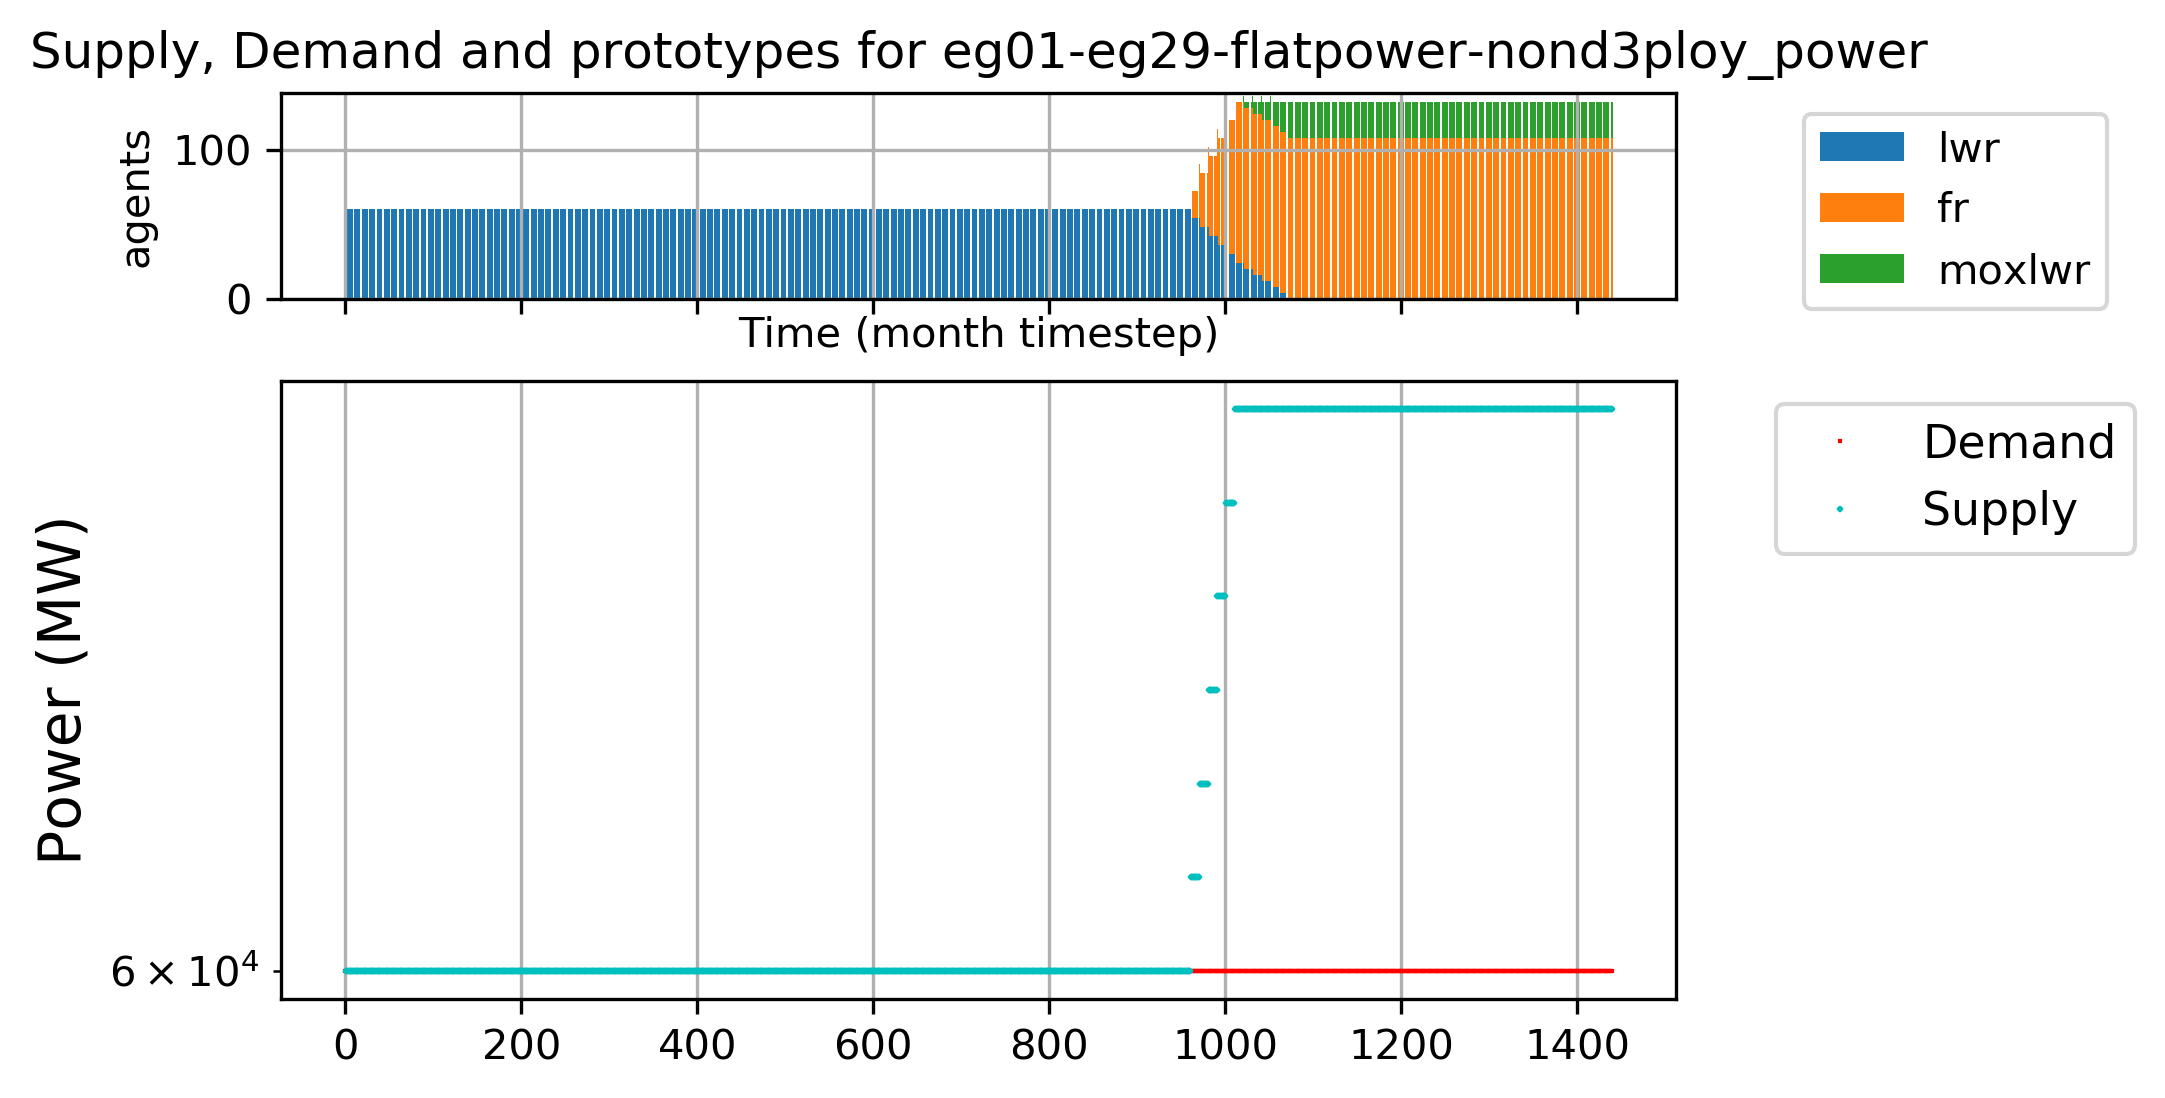

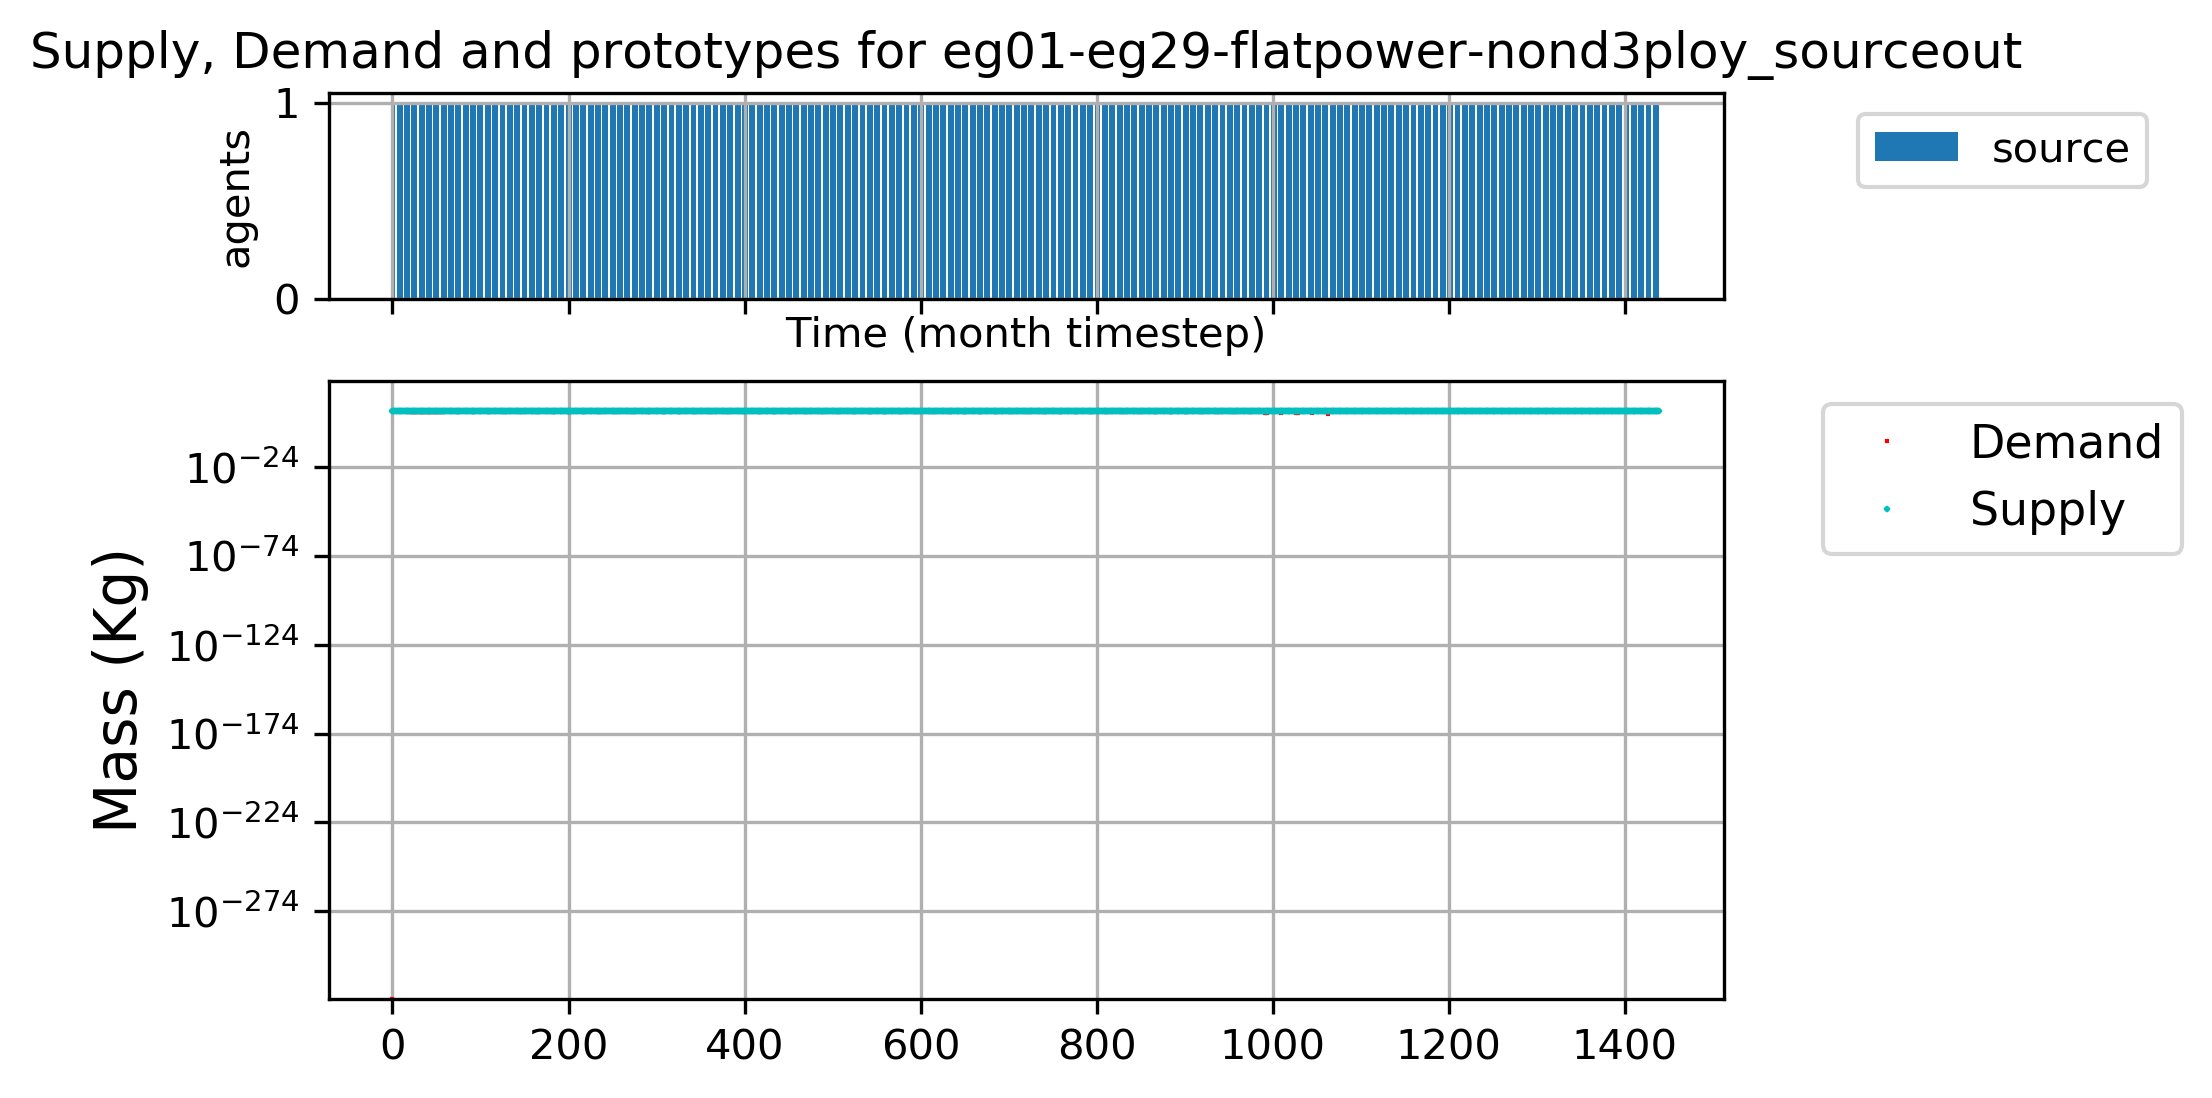

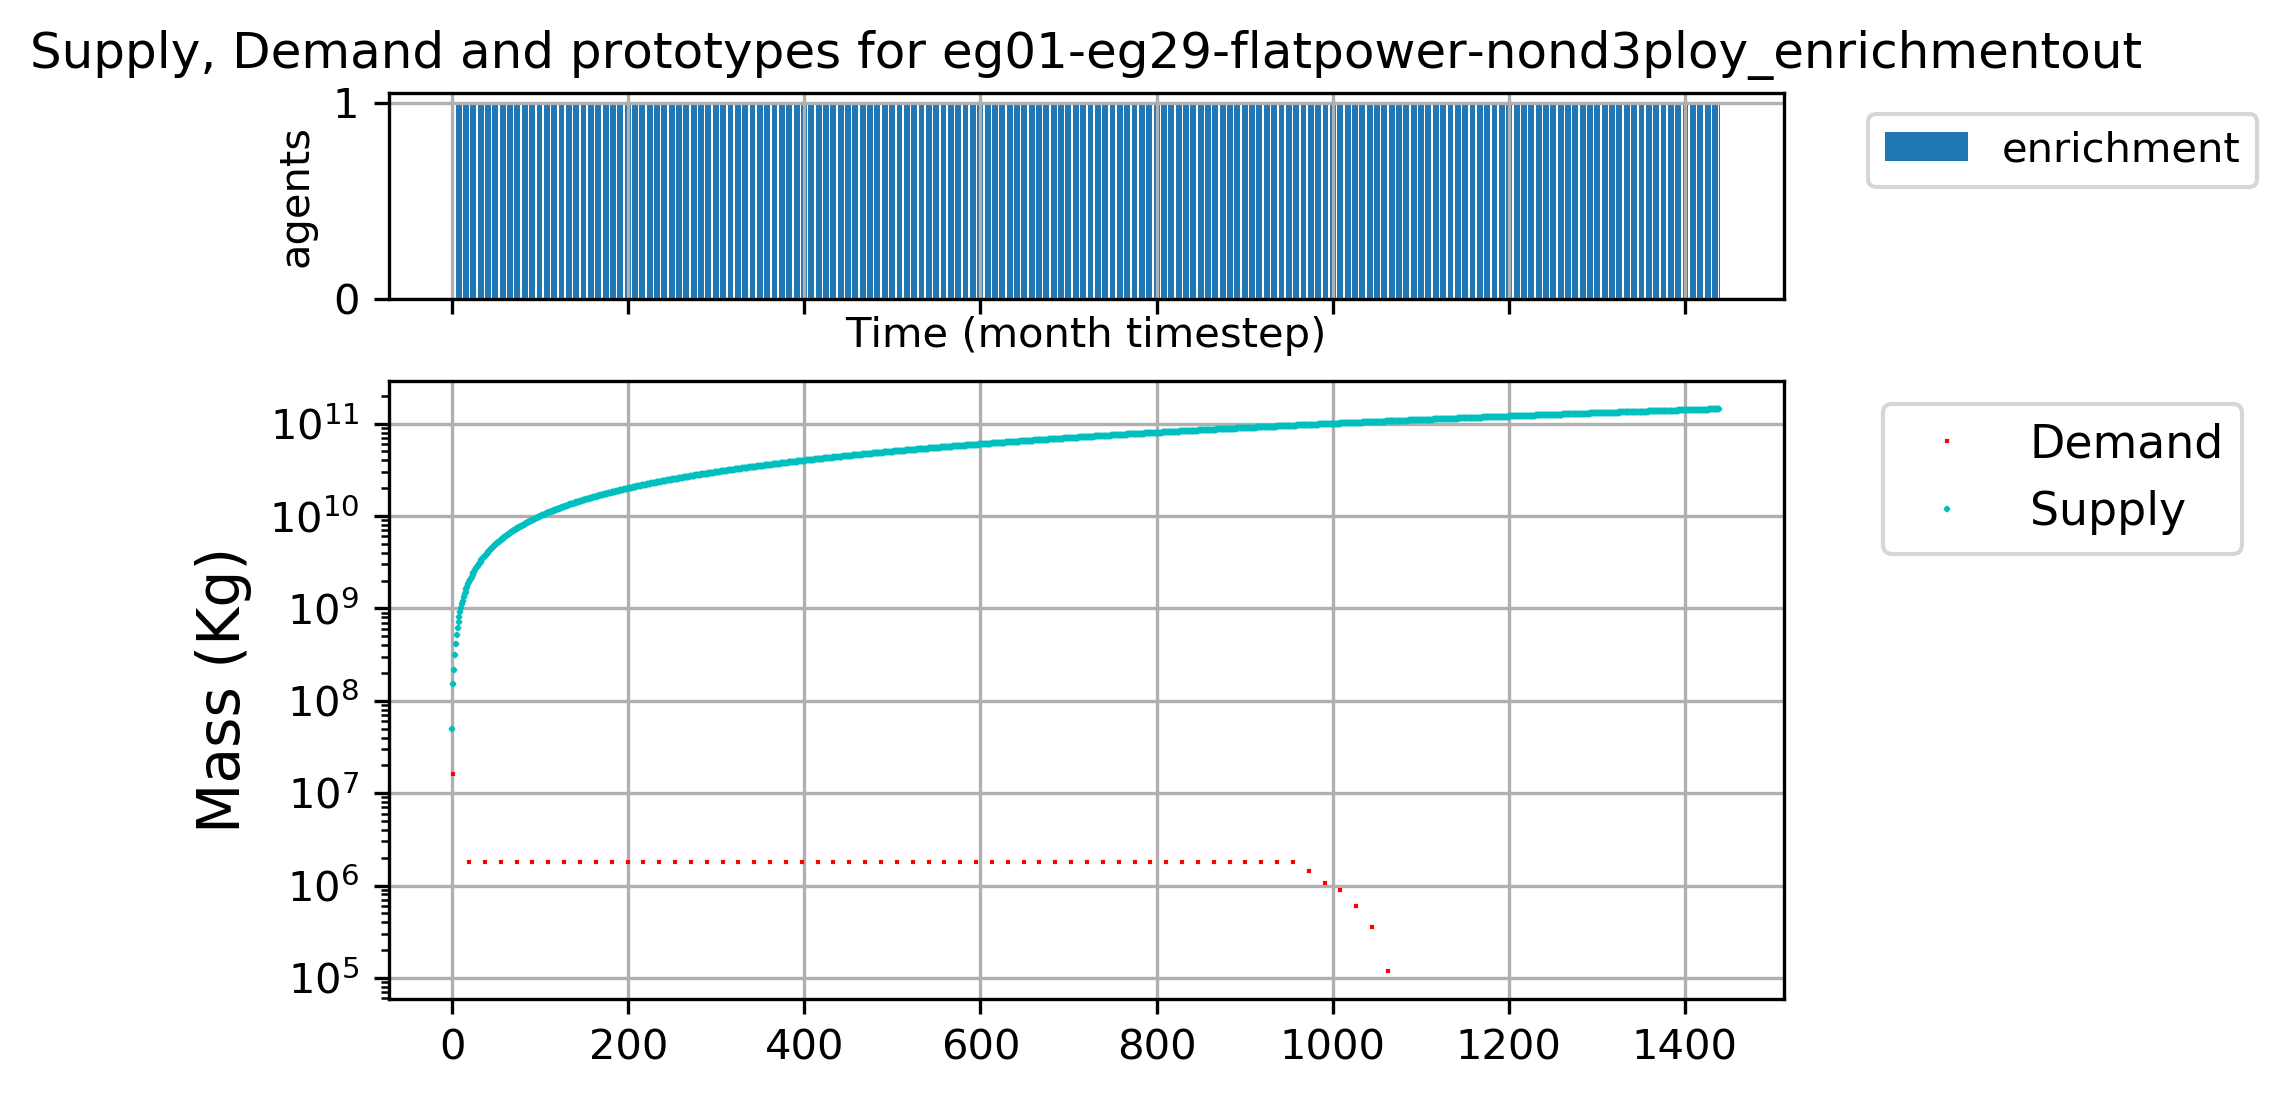

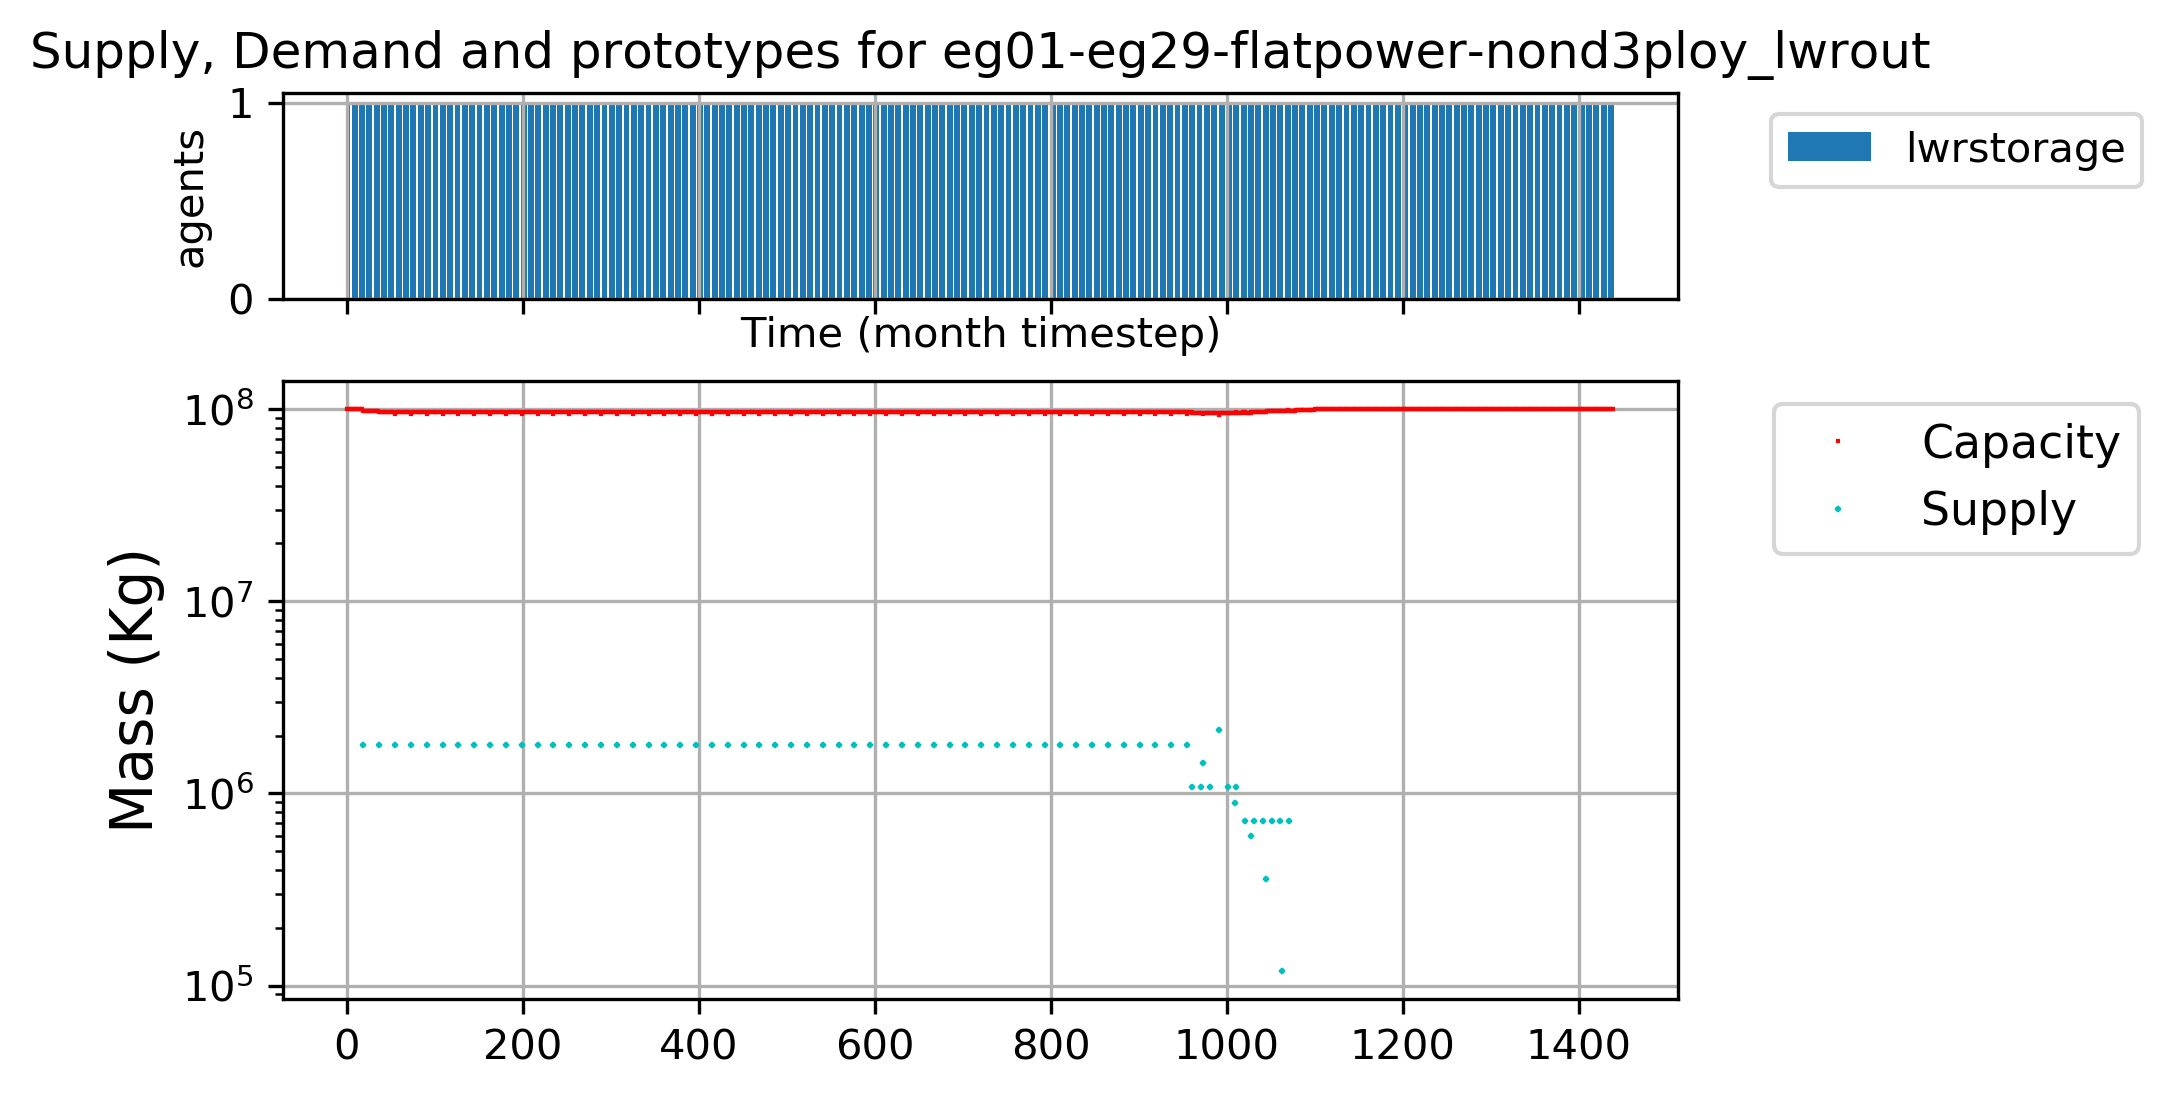

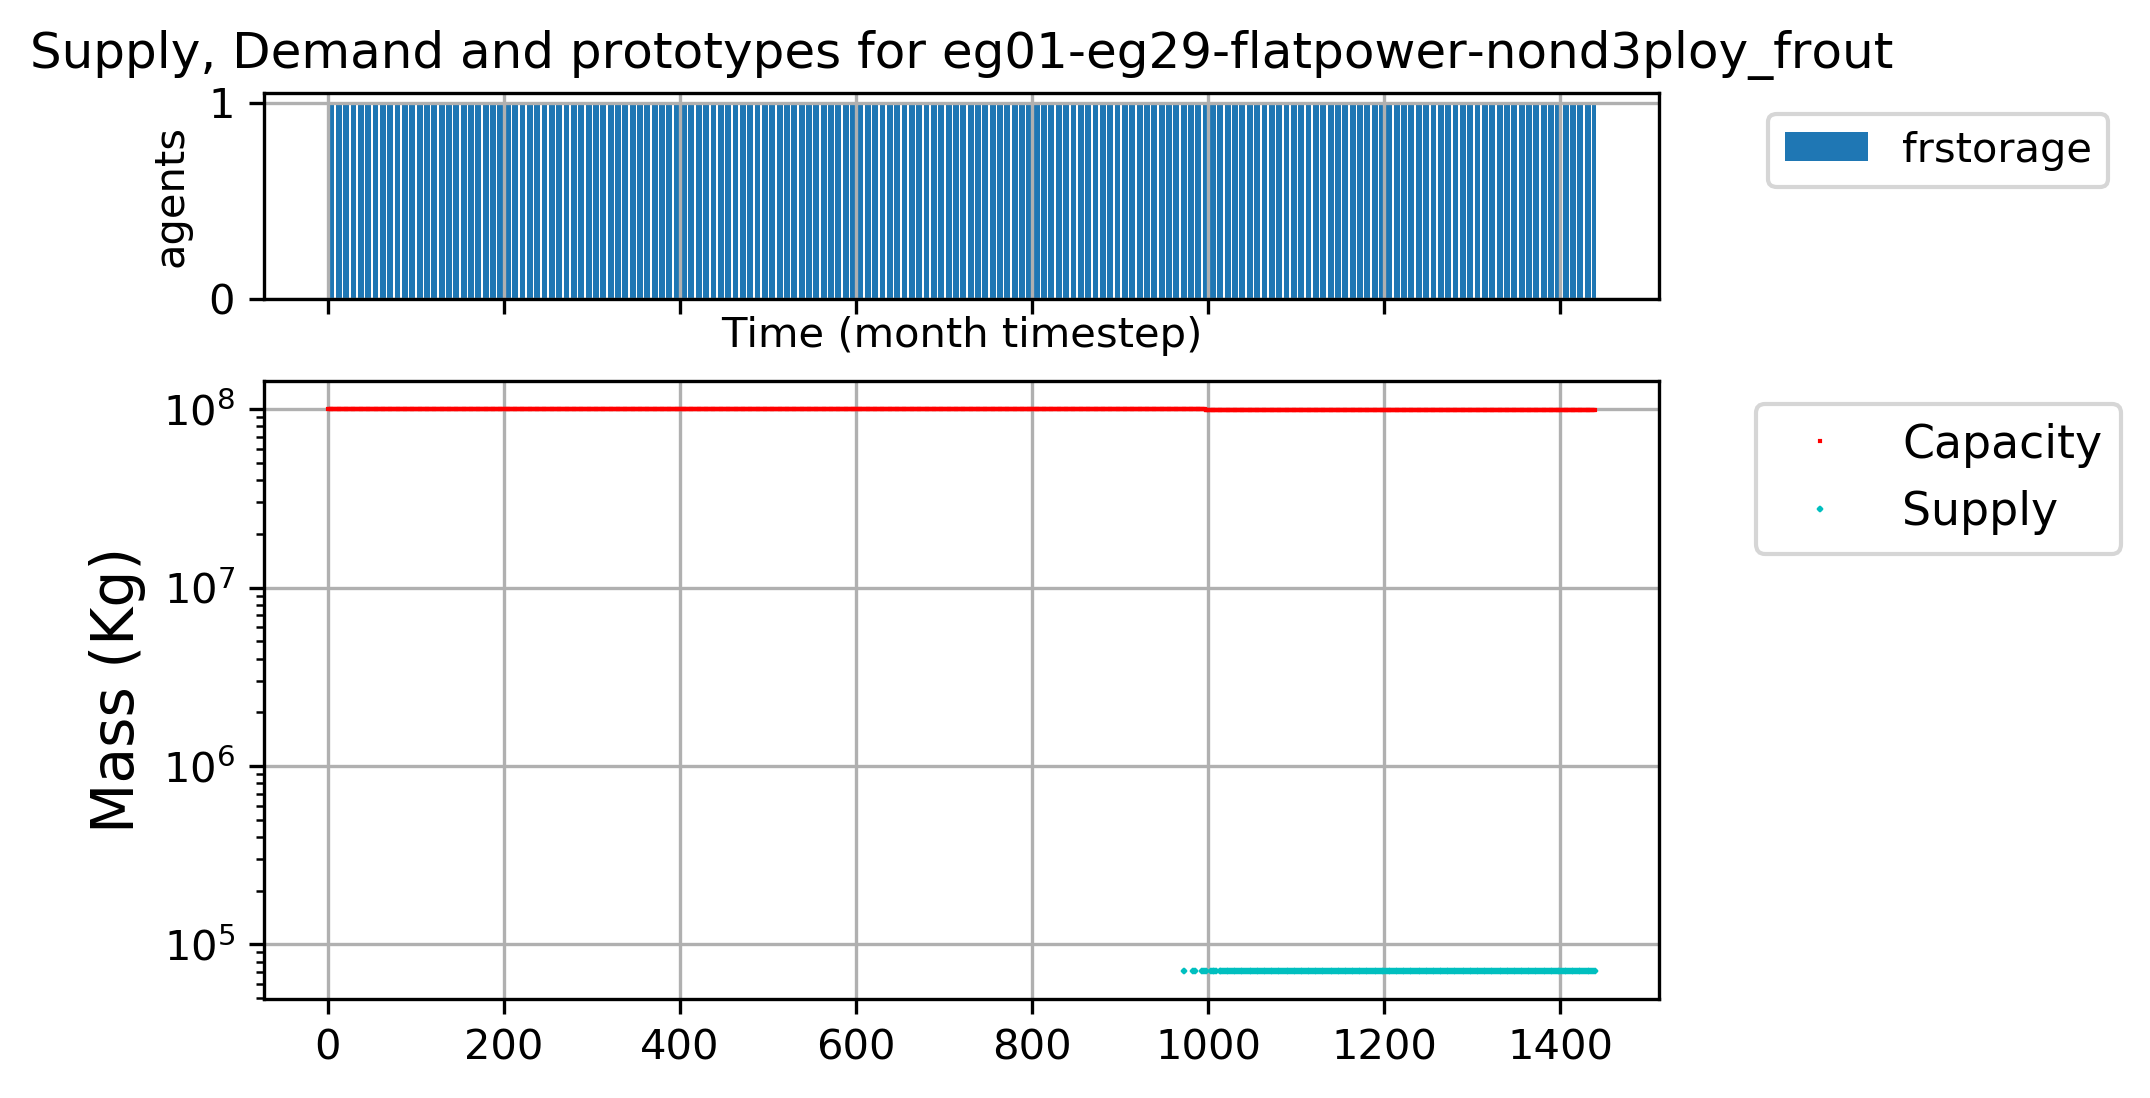

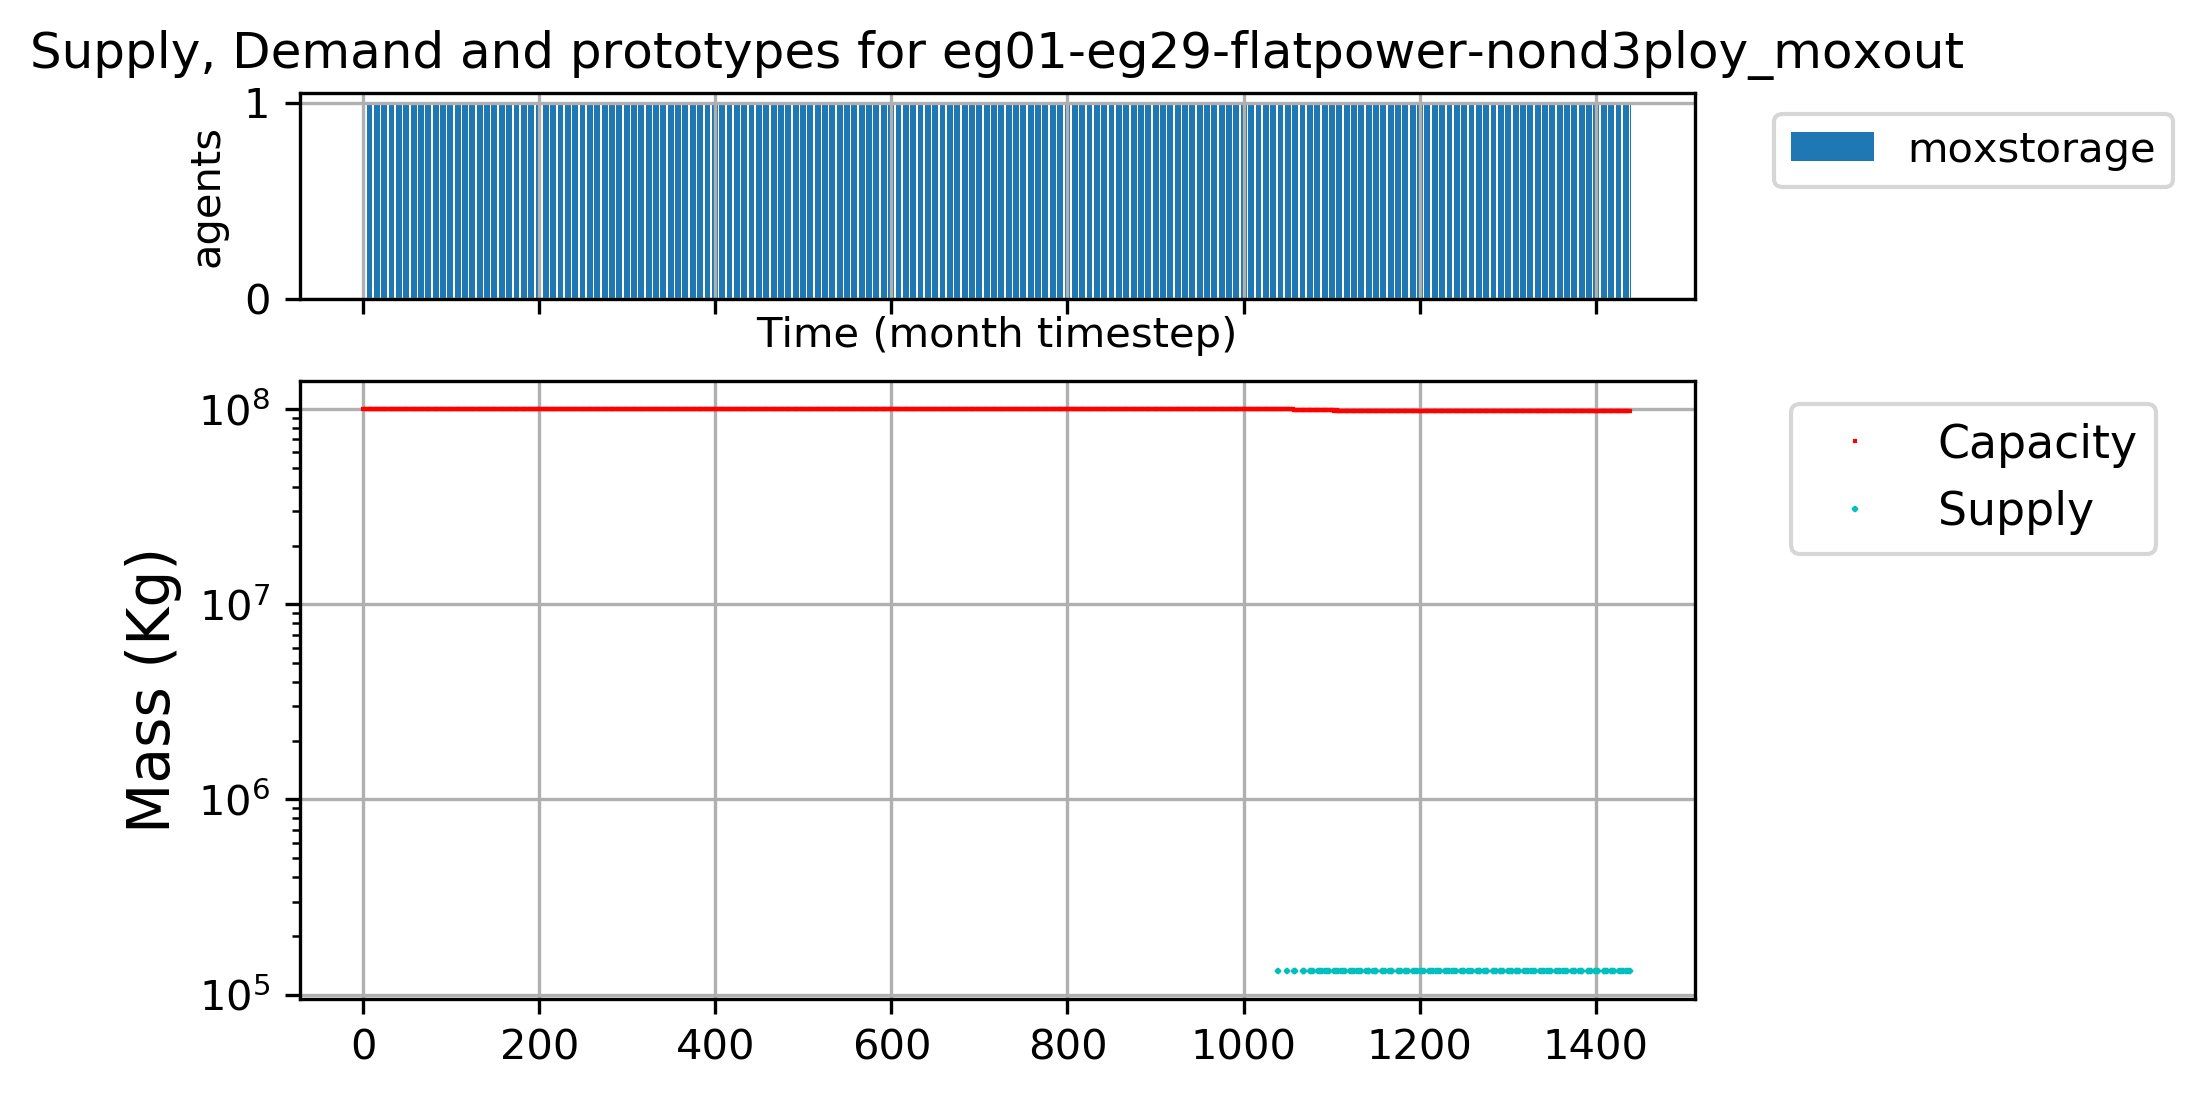

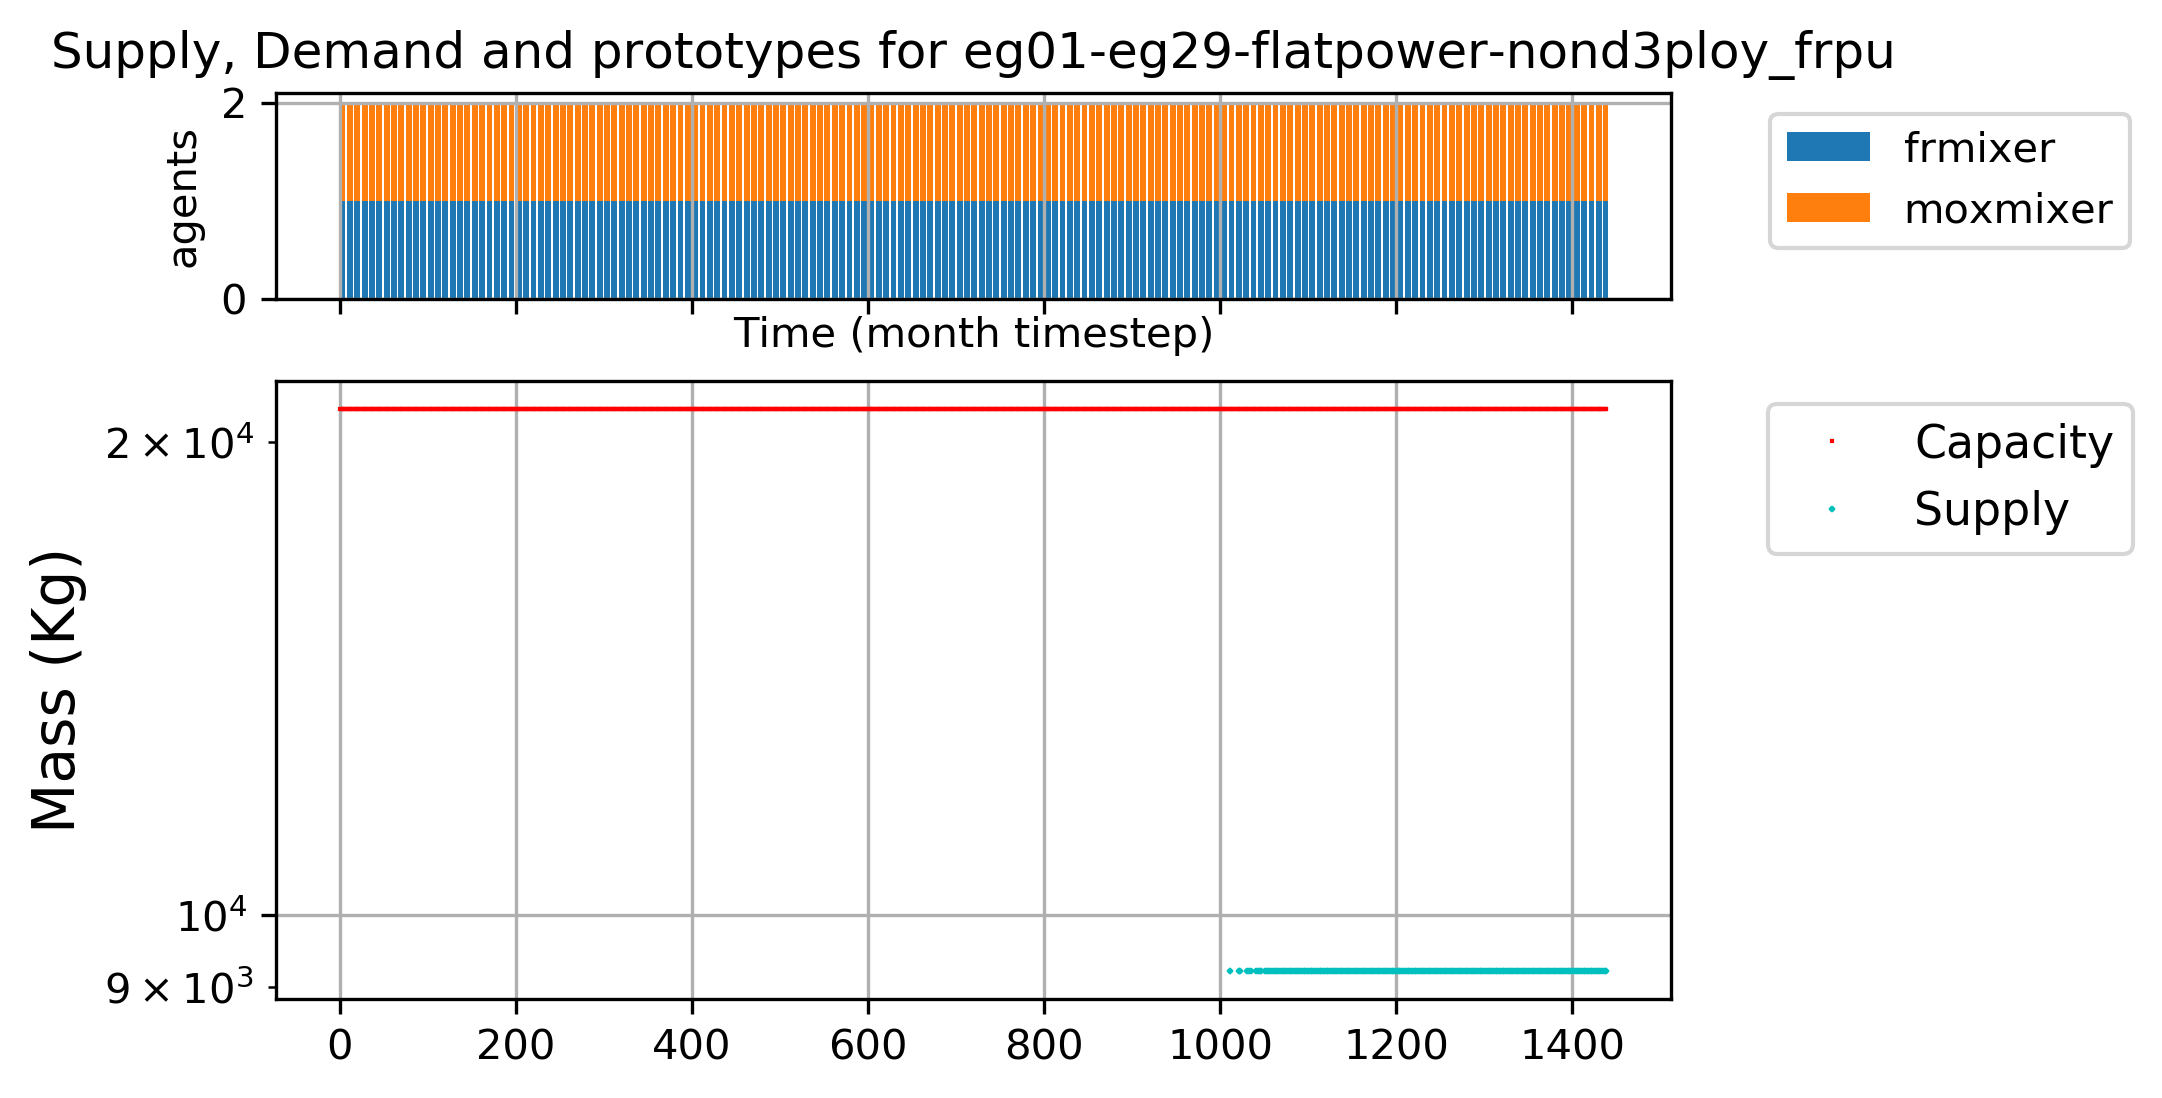

In [6]:
from IPython.display import Image
from IPython.display import display

I0 = Image(filename='eg01-eg29-flatpower-nond3ploy_power.png')
I1 = Image(filename='eg01-eg29-flatpower-nond3ploy_sourceout.png')
I2 = Image(filename='eg01-eg29-flatpower-nond3ploy_enrichmentout.png')
I3 = Image(filename='eg01-eg29-flatpower-nond3ploy_lwrout.png')
I4 = Image(filename='eg01-eg29-flatpower-nond3ploy_frout.png')
I5 = Image(filename='eg01-eg29-flatpower-nond3ploy_moxout.png')
I6 = Image(filename='eg01-eg29-flatpower-nond3ploy_frpu.png')

display(I0, I1, I2, I3, I4, I5, I6)
